## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Import CSV File

In [2]:
#get project directory
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))

file_path = os.path.join(project_root, 'Data Exploration/final_annotated_data.csv')
seed_file = os.path.join(project_root, 'Data Annotation/Human Annotation/Sample_annotation.csv')
df = pd.read_csv(file_path)
seed_file_df = pd.read_csv(seed_file)

#### Total number of rows

In [3]:
df = pd.concat([df, seed_file_df], ignore_index=True)

In [4]:
df.count()

Comment       5485
Annotation    5460
dtype: int64

#### Dropping the unlabelled comments

In [5]:
#filter out rows where 'label' is N/A
df = df[df['Annotation'].notna()]
df

,Comment,Annotation
0,90% joote case hai .....sab peso ke liye lagat...,Not Hatespeech
1,Suicide kar diya isne?,Not Hatespeech
2,To kar lo na sucide,Not Hatespeech
3,Tu bhai abhi billi bana h act ki wajah se kya ...,Hatespeech
4,मरने से कुछ नहीं होता भाई जेल जाने से पहले उनक...,Hatespeech
...,...,...
5480,in agama shiva temple and Vishnu temples pries...,Not Hatespeech
5481,"किसी न किसी संगठन से अवश्य जुड़े,वहां इन समस्या...",Not Hatespeech
5482,Rss ko bjp ke liye vote chahiye bas aur kuch b...,Not Hatespeech
5483,Bahut dukhad hai ye,Not Hatespeech


####  Dropping duplicate data

In [6]:
#check for duplicate rows
df.duplicated().sum()

137

In [7]:
#remove duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

0

#### Checking for missing values

In [8]:
df.count()

Comment       5323
Annotation    5323
dtype: int64

In [9]:
#check for missing values
df.isnull().sum()

Comment       0
Annotation    0
dtype: int64

####  Check for Class Imbalance

Number of rows in each label category:
Annotation
Not Hatespeech    3805
Hatespeech        1518
Name: count, dtype: int64


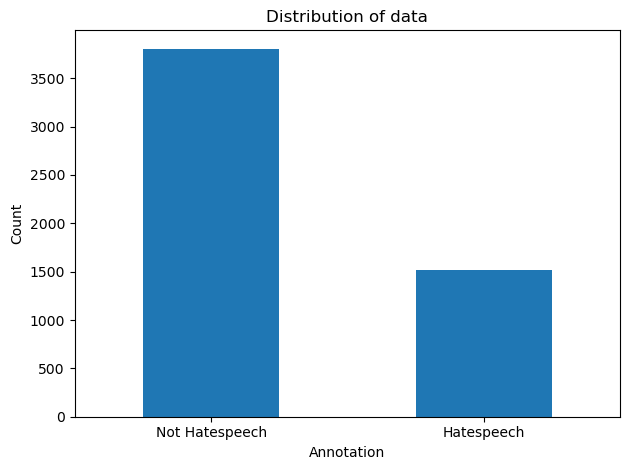

In [10]:
df.count()
#Check data is balanced or not
print("Number of rows in each label category:") 
print(df['Annotation'].value_counts())
df['Annotation'].value_counts().plot(kind='bar')
plt.title('Distribution of data')
plt.xlabel('Annotation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()


### Merging the augmented data with main dataset

In [98]:
augmented_file_path = os.path.join(project_root, "Data Augmentation/Gemini_augmented_data.csv")
augmented_data = pd.read_csv(augmented_file_path)

In [99]:
df = pd.concat([df,augmented_data], ignore_index=True)

In [100]:
df.duplicated().sum()

0

Number of rows in each label category:
Annotation
Not Hatespeech    3805
Hatespeech        3559
Name: count, dtype: int64


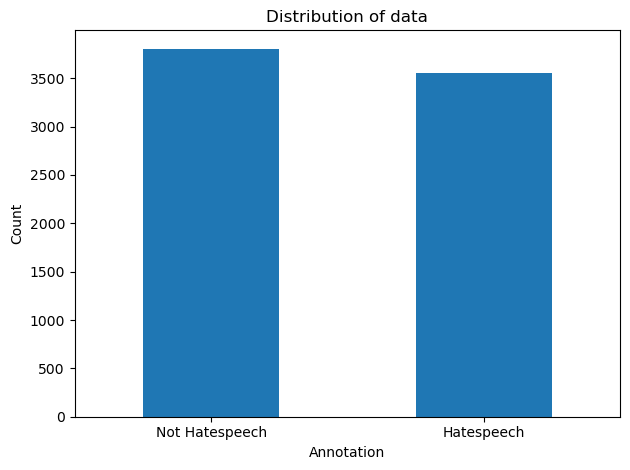

In [101]:
df.count()
#Check data is balanced or not
print("Number of rows in each label category:") 
print(df['Annotation'].value_counts())
df['Annotation'].value_counts().plot(kind='bar')
plt.title('Distribution of data')
plt.xlabel('Annotation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

In [102]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Comment,Annotation
0,"Dekho dalit log, reservation ke naam pe kitna ...",Hatespeech
1,"Hal hi me Gujrat me Dalit dolha ko mara gaya"" ...",Not Hatespeech
2,Yeh baat ne peesha mera canada mein bhi nhi sh...,Hatespeech
3,Ye to galat hua aapke sath ...😤😤😤😤,Not Hatespeech
4,O pagal uncle aunty jin baba saheb ke bare me...,Not Hatespeech
...,...,...
7359,"kya din aagaya today bhim army, next thakur ar...",Not Hatespeech
7360,All Indian will become salve again soon in 2025,Not Hatespeech
7361,Upper caste waale toh bas dalit logon ko neech...,Hatespeech
7362,Dalit bahut hindu banta hai 😂😂 obc bhi hindu b...,Not Hatespeech


In [104]:
df.to_csv("Final_Dataset",index=False)

Maximum length among the comments: 1166


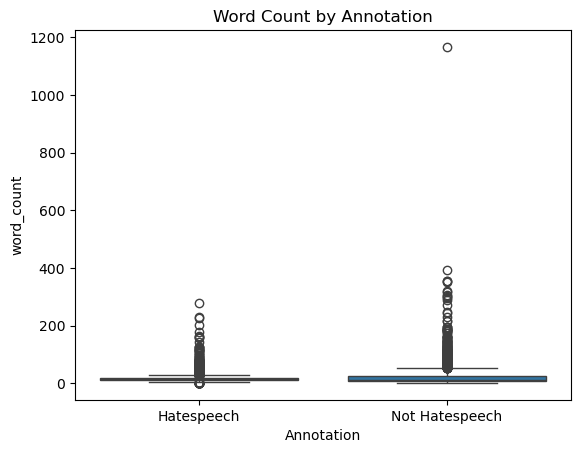

In [105]:
df_word_count = df.copy()
df_word_count['char_count'] = df_word_count['Comment'].str.len()
df_word_count['word_count'] = df_word_count['Comment'].str.split().apply(len)

#maximum length
max_length = df_word_count['word_count'].max()
print("Maximum length among the comments:", max_length)

# Word count boxplot
sns.boxplot(data=df_word_count, x='Annotation', y='word_count')
plt.title('Word Count by Annotation')
plt.show()
